# Feature Scaling

De nombreux algorithmes d'apprentissage automatique sont sensibles à l'échelle et à l'ampleur des caractéristiques. En particulier, les coefficients des modèles linéaires dépendent de l'échelle de la caractéristique, c'est-à-dire que la modification de l'échelle de la caractéristique modifiera la valeur des coefficients. Dans les modèles linéaires, ainsi que dans les algorithmes qui dépendent des calculs de distance, tels que le clustering et l'analyse des composants principaux, les entités avec des plages de valeurs plus grandes ont tendance à dominer les entités avec des plages plus petites. Ainsi, le fait d'avoir des caractéristiques à une échelle similaire nous permet de comparer l'importance des caractéristiques et aide également les algorithmes à converger plus rapidement, améliorant ainsi les performances et les temps d'entraînement Dans cet article, nous mettrons en œuvre plusieurs techniques afin de définir des variables numériques sur des plages de valeurs similaires.

Ce chapitre couvrira les recettes suivantes:
* La Standardisation 
* La normalisation moyenne
* Scaling avec les  valeurs maximales et minimales
* Scaling avec le maximum absolue
* Scaling avec avec la médiane et les quantiles
* Scaling à la longueur de l'unité vectorielle

## Standardiser les fonctionnalités

La standardisation est le processus consistant à centrer la variable à zéro et à Standardiser la variance à 1. Pour Standardiser les caractéristiques, nous soustrayons la moyenne de chaque observation, puis divisons le résultat par l'écart type.

$$z =\frac{x-mean(x)}{std(x)}  $$

Le résultat de la transformation précédente est appelé le score z et représente le nombre d'écarts-types qu'une observation donnée s'écarte de la moyenne. Dans cette recette, nous allons implémenter la standardisation avec scikit-learn

In [38]:
import pandas as pd

# dataset for the demo
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# the scaler - for standardization
from sklearn.preprocessing import StandardScaler

In [39]:

# load the the Boston House price data

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# add target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [40]:
# let's separate the data into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [41]:

# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# the scaler stores the mean of the features, learned from train set

scaler.mean_

array([3.35828432e+00, 1.18093220e+01, 1.10787571e+01, 6.49717514e-02,
       5.56098305e-01, 6.30842655e+00, 6.89940678e+01, 3.76245876e+00,
       9.35310734e+00, 4.01782486e+02, 1.84734463e+01, 3.60601186e+02,
       1.24406497e+01])

In [43]:
# let's transform the returned NumPy arrays to dataframes

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

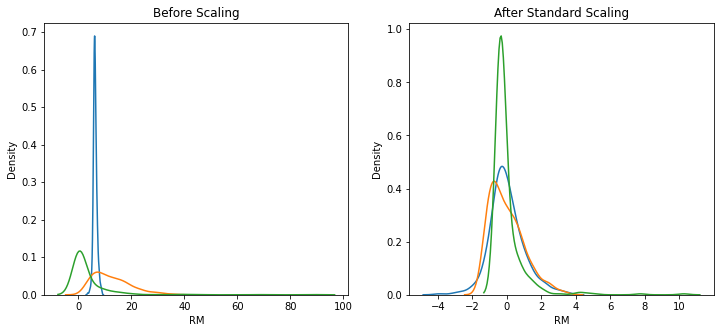

In [45]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

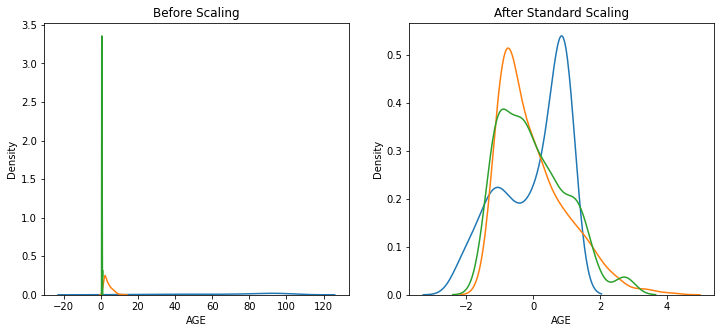

In [46]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

## La normalisation moyenne

Dans la normalisation moyenne, nous centrons la variable à zéro et rééchelonnons la distribution à la plage de valeurs. Cette procédure consiste à soustraire la moyenne de chaque observation et à diviser le résultat par la différence entre les valeurs minimale et maximale.

$$xscaled =\frac{x-mean(x)}{max(x)-min(x)}  $$

Cette transformation aboutit à une distribution centrée sur 0, avec ses valeurs minimum et maximum comprises entre -1 et 1. Dans cette recette, nous allons implémenter la normalisation moyenne avec scikit-learn

In [47]:
# the scalers - for mean normalisation
from sklearn.preprocessing import StandardScaler, RobustScaler

In [48]:
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

Il n'y a pas de transformateur scikit-learn dédié pour implémenter la normalisation moyenne, mais nous pouvons implémenter la normalisation moyenne en combinant l'utilisation de deux transformateurs.

Mettons en place le StandardScaler() de scikit-learn pour qu'il apprenne et soustrait la moyenne mais ne divise pas le résultat par l'écart type
et, configurons RobustScaler() à partir de scikit-learn afin qu'il ne supprime pas la médiane des valeurs mais la divise par la plage de valeurs, c'est-à-dire la différence entre les valeurs maximale et minimale

Pour diviser par la différence entre les valeurs minimales et maximales, nous devons spécifier (0, 100) dans l'argument quantile_range de RobustScaler()

In [49]:
# set up the StandardScaler so that it removes the mean
# but does not divide by the standard deviation
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# set up the robustscaler so that it does NOT remove the median
# but normalises by max()-min(), important for this to set up the
# quantile range to 0 and 100, which represent the min and max values
scaler_minmax = RobustScaler(with_centering=False,
                             with_scaling=True,
                             quantile_range=(0, 100))

# fit the scalers to the train set, it will learn the parameters
scaler_mean.fit(X_train)
scaler_minmax.fit(X_train)

# transform train and test sets
X_train_scaled = scaler_minmax.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_minmax.transform(scaler_mean.transform(X_test))

In [50]:

# let's transform the returned NumPy arrays to dataframes

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

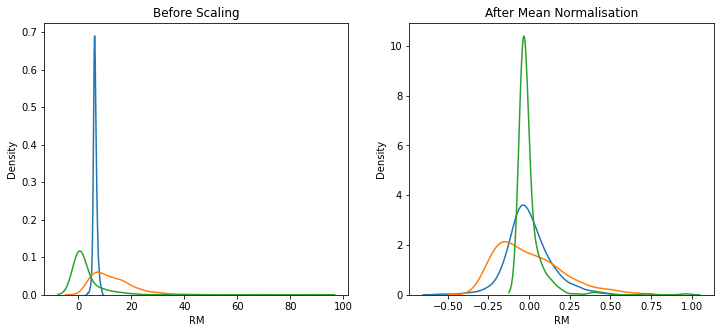

In [51]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Mean Normalisation')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

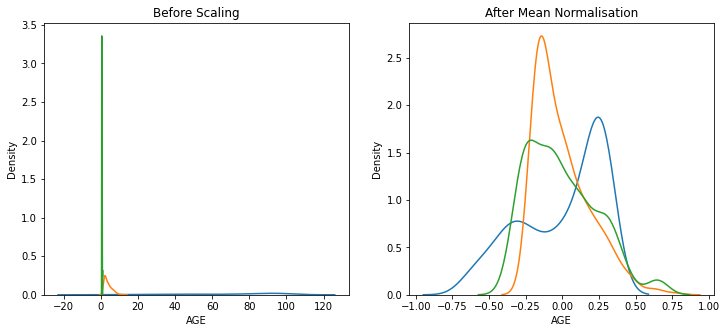

In [52]:

# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Mean Normalisation')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

## Scaling avec les valeurs maximum et minimum

La mise à l'échelle avec les valeurs minimales et maximales comprime les valeurs des variables entre 0 et 1. Pour mettre en œuvre cette technique de mise à l'échelle, nous devons soustraire la valeur minimale de toutes les observations et diviser le résultat par la plage de valeurs, c'est-à-dire la différence entre la valeur maximale et valeurs minimales :

$$xscaled =\frac{x-min(x)}{max(x)-min(x)}  $$

Dans cette recette, nous allons implémenter la mise à l'échelle sur les valeurs minimales et maximales en utilisant scikit-lear

In [53]:
# the scaler - for min-max scaling
from sklearn.preprocessing import MinMaxScaler

In [54]:
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [55]:

# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:

# the scaler stores the maximum values of the features, learned from train set
scaler.data_max_

array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        36.98  ])

In [57]:
# tthe scaler stores the minimum values of the features, learned from train set
scaler.min_

array([-7.10352762e-05,  0.00000000e+00, -1.68621701e-02,  0.00000000e+00,
       -7.92181070e-01, -6.82314620e-01, -2.98661174e-02, -1.07210358e-01,
       -4.34782609e-02, -3.56870229e-01, -1.34042553e+00, -8.06898986e-04,
       -4.90780142e-02])

In [58]:
# the scaler also stores the value range (max -  min)

scaler.data_range_

array([8.896988e+01, 1.000000e+02, 2.728000e+01, 1.000000e+00,
       4.860000e-01, 5.219000e+00, 9.710000e+01, 1.095230e+01,
       2.300000e+01, 5.240000e+02, 9.400000e+00, 3.965800e+02,
       3.525000e+01])

In [59]:
# let's transform the returned NumPy arrays to dataframes

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

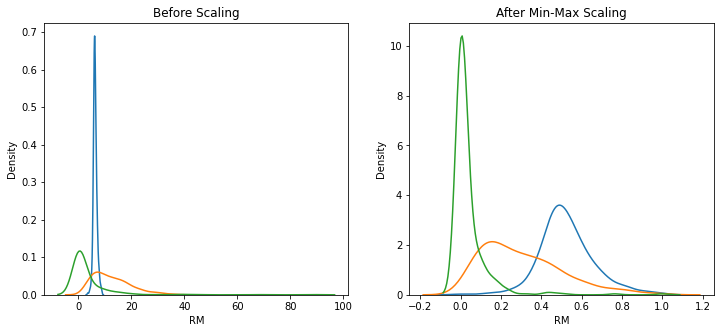

In [60]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

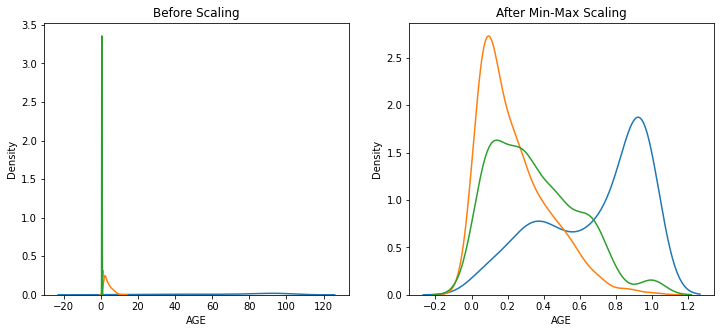

In [61]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

## Scaling avec le maximum absolue

La mise à l'échelle avev le maximum absolue met les données à l'échelle à leur valeur maximale ; c'est-à-dire qu'il divise chaque observation par la valeur maximale de la variable

$$ xscaled = \frac{x}{max(x)}$$

Le résultat de la transformation précédente est une distribution dans laquelle les valeurs varient approximativement dans la plage de -1 à 1. Dans cette recette, nous allons implémenter une mise à l'échelle absolue maximale avec scikit-learn

In [73]:
# the scaler - for MaxAbsScaling, with centering
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

In [74]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [75]:

# set up the scaler
scaler = MaxAbsScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
# the scaler stores the maximum values of the features as learned from train set
scaler.max_abs_

array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        36.98  ])

In [77]:
# let's transform the returned NumPy arrays to dataframes 

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

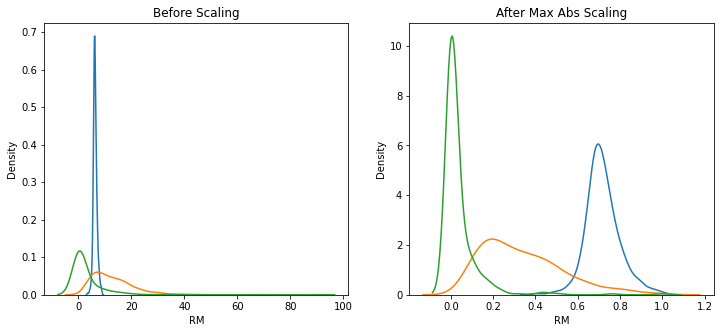

In [78]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Max Abs Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

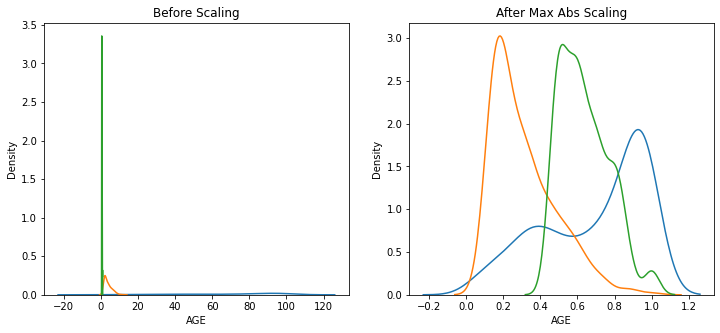

In [79]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Max Abs Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

In [80]:
### Centering + MaxAbsScaling

Nous pouvons centrer les distributions variables à 0 puis les mettre à l'échelle à leur maximum absolu, comme le recommande scikit-learn, en combinant l'utilisation de deux transformateurs.

In [81]:
# set up the StandardScaler so that it removes the mean
# but does not divide by the standard deviation
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# set up the MaxAbsScaler normally
scaler_maxabs = MaxAbsScaler()

# fit the scalers to the train set, it will learn the parameters
scaler_mean.fit(X_train)
scaler_maxabs.fit(X_train)

# transform train and test sets
X_train_scaled = scaler_maxabs.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_maxabs.transform(scaler_mean.transform(X_test))

In [82]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

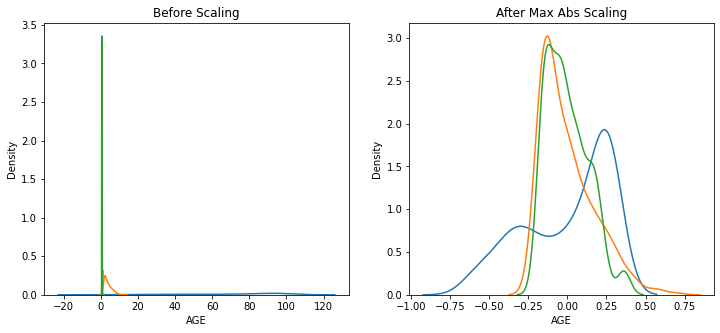

In [83]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Max Abs Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

## Mise à l'échelle avec la médiane et les quantiles

Lors de la mise à l'échelle des variables à la médiane et aux quantiles, la valeur médiane est soustraire de toutes les observations et le résultat est divisé par l'intervalle interquartile (IQR). L'IQR est l'intervalle entre le 1er quartile et le 3e quartile, ou, en d'autres termes, l'intervalle entre le 25e quantile et le 75e quantile.

$$ xscaled = \frac{x-median(x)}{75thQuantile(x)-25thQuantile(x)}$$

Cette méthode est connue sous le nom de mise à l'échelle robuste car elle produit des estimations plus robustes pour le centre et la plage de valeurs de la variable, et est recommandée si les données contiennent des valeurs aberrantes. Dans cette recette, nous allons implémenter la mise à l'échelle avec la médiane et l'IQR en utilisant scikit-learn

In [84]:
# the scaler - for robust scaling
from sklearn.preprocessing import RobustScaler

In [85]:

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [86]:

# set up the scaler
scaler = RobustScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:

# the scaler stores the median values of the features as learned from train set
scaler.center_

array([2.62660e-01, 0.00000e+00, 8.56000e+00, 0.00000e+00, 5.38000e-01,
       6.21550e+00, 7.94500e+01, 3.21570e+00, 5.00000e+00, 3.11000e+02,
       1.91000e+01, 3.91605e+02, 1.11600e+01])

In [88]:
# the scaler stores the IQR values of the features as learned from train set

scaler.scale_

array([3.030275e+00, 2.000000e+01, 1.315000e+01, 1.000000e+00,
       1.792500e-01, 7.520000e-01, 4.857500e+01, 2.971650e+00,
       2.000000e+01, 3.900000e+02, 2.800000e+00, 1.963250e+01,
       9.982500e+00])

In [89]:
# let's transform the returned NumPy arrays to dataframes

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

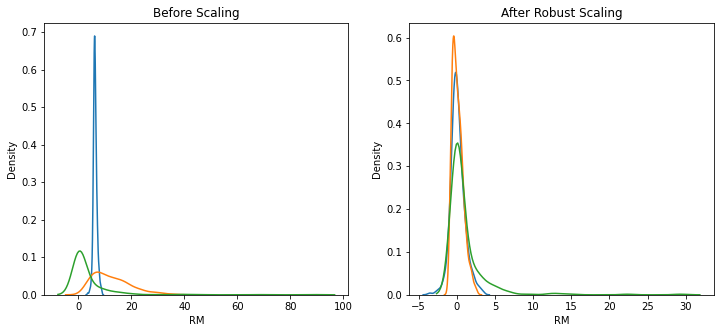

In [90]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['RM'], ax=ax1)
sns.kdeplot(X_train['LSTAT'], ax=ax1)
sns.kdeplot(X_train['CRIM'], ax=ax1)

# after scaling
ax2.set_title('After Robust Scaling')
sns.kdeplot(X_train_scaled['RM'], ax=ax2)
sns.kdeplot(X_train_scaled['LSTAT'], ax=ax2)
sns.kdeplot(X_train_scaled['CRIM'], ax=ax2)
plt.show()

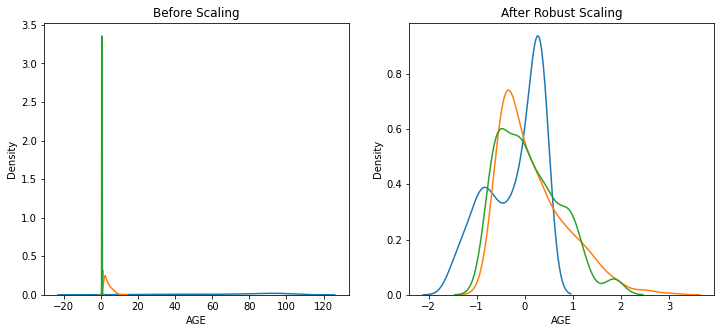

In [91]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['AGE'], ax=ax1)
sns.kdeplot(X_train['DIS'], ax=ax1)
sns.kdeplot(X_train['NOX'], ax=ax1)

# after scaling
ax2.set_title('After Robust Scaling')
sns.kdeplot(X_train_scaled['AGE'], ax=ax2)
sns.kdeplot(X_train_scaled['DIS'], ax=ax2)
sns.kdeplot(X_train_scaled['NOX'], ax=ax2)
plt.show()

## Mise à l'échelle à la longueur de l'unité vectorielle

Lors de la mise à l'échelle en longueur d'unité vectorielle, nous transformons les composants d'un vecteur de caractéristiques de sorte que le vecteur transformé ait une longueur de 1, ou en d'autres termes, une norme de 1. Notez que cette technique de mise à l'échelle met à l'échelle le vecteur de caractéristiques, par opposition à chaque variable individuelle ,par rapport à ce que nous avons fait dans les autres recettes de cet article. Un vecteur caractéristique contient les valeurs de chaque variable pour une seule observation. Lors de la mise à l'échelle de la longueur de l'unité vectorielle, nous divisons chaque vecteur de caractéristiques par sa norme.

L'échelle à la norme unitaire est obtenue en divisant chaque vecteur d'observation par la distance de Manhattan (norme l1) ou la distance euclidienne (norme l2) du vecteur. La distance de Manhattan est donnée par la somme des composantes absolues du vecteur

$$ l1(X) = |x_1| + |x_2|+...+|x_n| $$

D'autre part, la distance euclidienne est donnée par la racine carrée de la somme carrée de la composante du vecteur :

$$l2(X) = \sqrt{x_1^2+x_2^2+...+x_n^2} $$

Ici, x1, x2 et xn sont les valeurs des variables 1, 2 et n pour chaque observation.

Mise à l'échelle à la norme unitaire, exemples:

Par exemple, si nos données ont 1 observations (1 ligne) et 3 variables :

* nombre d'animaux
* Nombre d'enfants
* âge
Les valeurs de chaque variable pour cette seule observation sont 10, 15 et 20. Notre vecteur X = [10, 15, 20]. Puis:

l1(X) = 10 + 15 + 20 = 45

l2(X) = carré( 10^2 + 15^2 + 20^2) = carré( 100 + 225 + 400) = 26,9

La distance euclidienne est toujours plus petite que la distance de Manhattan.

Les valeurs vectorielles normalisées sont donc :

X_scaled_l1 = [ 10/45, 15/45, 20/45 ] = [0,22, 0,33, 0,44]

X_scaled_l2 = [10/26,9, 15/26,9, 20/26,9 ] = [0,37, 0,55, 0,74]

In [92]:
# the scaler - for robust scaling
from sklearn.preprocessing import Normalizer

In [93]:

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

### Scaling to l1

In [94]:

# set up the scaler
scaler = Normalizer(norm='l1') # for euclidean distance we change to norm='l2' 

# fit the scaler, this procedure does NOTHING
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Scaling to l2

In [95]:
# set up the scaler
scaler = Normalizer(norm='l2')

# fit the scaler, this procedure does NOTHING
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)